# Computer Vision

In [1]:
from pathlib import Path
import torch
from torch import nn

import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.model_selection import train_test_split

In [2]:
train_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
    target_transform=None
)
test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

In [3]:
len(train_data),len(test_data)

(60000, 10000)

In [4]:
#see the first training example
image, label = train_data[0]
label,image.shape, image
#Color,Height, width

(9,
 torch.Size([1, 28, 28]),
 tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.

In [5]:
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [6]:
class_to_idx = train_data.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

(-0.5, 27.5, 27.5, -0.5)

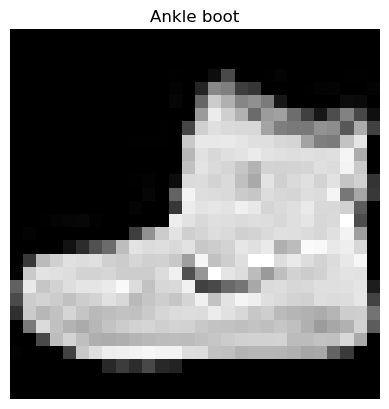

In [7]:
image_tensor_permuted = image.permute(1,2,0) # now its Height, width,color
plt.imshow(image_tensor_permuted,cmap='gray')
plt.title(class_names[label])
plt.axis(False) #to remove the axis

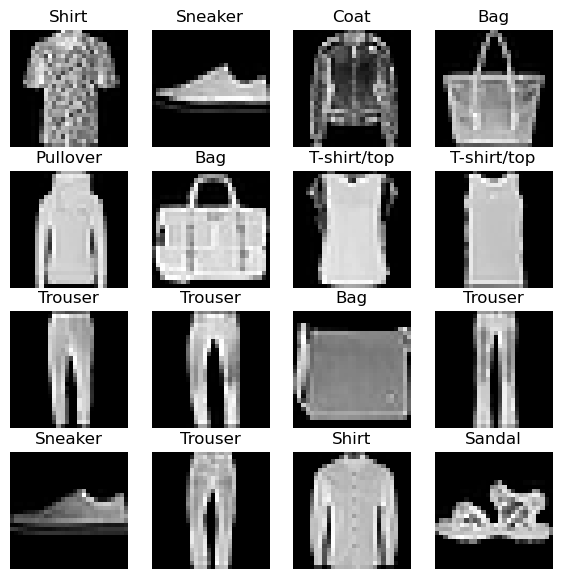

In [8]:
# print random images
torch.manual_seed=42
fig = plt.figure(figsize=(7,7))
rows,cols=4,4
for i in range(1,rows*cols+1):
    random_idx = torch.randint(0,len(train_data),size=[1]).item()
    #print(random_idx)
    img, label = train_data[random_idx]
    fig.add_subplot(rows,cols,i)
    plt.imshow(img.squeeze(),cmap='gray')
    plt.title(class_names[label])
    plt.axis(False)

In [9]:
# prepare dataloader in batches 32
from torch.utils.data import DataLoader
BATCH_SIZE=32
train_dataloader = DataLoader(dataset=train_data, 
                              batch_size=BATCH_SIZE, 
                              shuffle=True)
test_dataloader = DataLoader(dataset=test_data, 
                             batch_size=BATCH_SIZE, 
                             shuffle=False)

len(train_dataloader),len(test_dataloader)

(1875, 313)

In [10]:
#check inside the training dataloader
train_feature_batch,train_labels_batch = next(iter(train_dataloader))
train_feature_batch.shape,train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

(-0.5, 27.5, 27.5, -0.5)

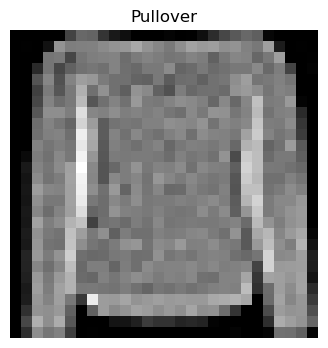

In [11]:
# show a sample
torch.manual_seed=42
random_idx = torch.randint(0,len(train_feature_batch),size=[1]).item()

fig = plt.figure(figsize=(4,4))

img, label = train_feature_batch[random_idx],train_labels_batch[random_idx]
plt.imshow(img.squeeze(),cmap='gray')
plt.title(class_names[label])
plt.axis(False)

## Build baseline model

In [12]:
from torch import nn
class FashionMNISTModelV0(nn.Module):
    def __init__(self, input_shape:int, hidden_unit:int,output_shape:int):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=input_shape,
                     out_features=hidden_unit),
            nn.Linear(in_features=hidden_unit,
                     out_features=output_shape)
        )
    def forward(self,x):
        return self.layer_stack(x)
    
   

In [13]:
torch.manual_seed=42
model_0 = FashionMNISTModelV0(
    input_shape=784, #28x28 image size
    hidden_unit=10,
    output_shape=len(class_names)  
)

model_0.to("cpu")

FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [14]:
# to import external py file and its function to our project
import requests
from pathlib import Path

if Path("helper_function.py").is_file():
    print("helper file exist")
else:
    print("downloading...")
    request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
    with open("helper_function.py","wb") as f:
        f.write(request.content)

helper file exist


In [15]:

# def accuracy_fn(y_true,y_pred):
#     correct = torch.eq(y_true,y_pred).sum().item()
#     acc = (correct/len(y_pred))*100
#     return acc

#or
from helper_function import accuracy_fn

## loss fn and optimizer and accuracy
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_0.parameters(),lr=0.1)


In [16]:
# to time our experiment
from timeit import default_timer as timer

def print_train_time(start:float,
                    end:float,
                    device:torch.device=None):
    """Prints difference between start and end time.

    Args:
        start (float): Start time of computation (preferred in timeit format). 
        end (float): End time of computation.
        device ([type], optional): Device that compute is running on. Defaults to None.

    Returns:
        float: time between start and end in seconds (higher is longer).
    """
    total_time=end-start
    print(f"Train time on {device}: {total_time:.3f} seconds")
    return total_time
    

## train test loop

In [17]:
from tqdm.auto import tqdm

torch.manual_seed=42
train_start = timer()


epochs=3

for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n-----")
    train_loss =0
    #add loop for batch
    for batch,(X,y) in enumerate(train_dataloader):
        model_0.train()
        #forward pass
        y_pred = model_0(X)
        #calculating loss per batch
        loss = loss_fn(y_pred,y)
        train_loss+=loss
        #optimize
        optimizer.zero_grad()
        #losss backward propg
        loss.backward()
        #optimizer step
        optimizer.step()
        #print
        if batch % 900 ==0:
            print(f"Looked at {batch*len(X)}/{len(train_dataloader.dataset)} samples")
    #
    train_loss/=len(train_dataloader)
    
    ##testing loop
    test_loss,test_acc =0,0
    model_0.eval()
    with torch.inference_mode():
        for X_test,y_test in test_dataloader:
            test_pred = model_0(X_test)
            test_loss+= loss_fn(test_pred,y_test)
            test_acc+= accuracy_fn(y_true=y_test,y_pred=test_pred.argmax(dim=1))
        test_loss/=len(test_dataloader)
        test_acc/=len(test_dataloader)
    print(f"Train loss: {train_loss:.4f} | Test loss: {test_loss:.4f}, Test acc: {test_acc:.4f}\n")
    
    
train_end=timer()
tot_1 = print_train_time(train_start,train_end,device = str(next(model_0.parameters()).device))

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
-----
Looked at 0/60000 samples
Looked at 28800/60000 samples
Looked at 57600/60000 samples
Train loss: 0.5955 | Test loss: 0.5244, Test acc: 81.7991

Epoch: 1
-----
Looked at 0/60000 samples
Looked at 28800/60000 samples
Looked at 57600/60000 samples
Train loss: 0.4761 | Test loss: 0.5256, Test acc: 80.9605

Epoch: 2
-----
Looked at 0/60000 samples
Looked at 28800/60000 samples
Looked at 57600/60000 samples
Train loss: 0.4557 | Test loss: 0.4726, Test acc: 83.0272

Train time on cpu: 57.062 seconds


## make prediction and model_0 result

In [18]:
torch.manual_seed=42
def eval_model(model:torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn:torch.nn.Module,
               accuracy_fn):
    loss,acc=0,0
    model.eval()
    with torch.inference_mode():
        for X,y in tqdm(data_loader):
            y_pred = model(X)
            loss+= loss_fn(y_pred,y)
            acc+= accuracy_fn(y_true=y,y_pred=y_pred.argmax(dim=1))
        loss/=len(data_loader)
        acc/=len(data_loader)
    return {"model_name":model.__class__.__name__,
            "model_loss":loss.item(),
            "model_acc":acc
           }         

In [19]:
model_0_results = eval_model(model=model_0, 
                             data_loader=test_dataloader,
                             loss_fn=loss_fn, 
                             accuracy_fn=accuracy_fn
                            )
model_0_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.47256970405578613,
 'model_acc': 83.02715654952077}

# Better model.  Non-linear model

In [20]:
import torch
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [21]:
from torch import nn
class FashionMNISTModelV1(nn.Module):
    def __init__(self, input_shape:int, hidden_unit:int,output_shape:int):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=input_shape,out_features=hidden_unit),
            nn.ReLU(),
            nn.Linear(in_features=hidden_unit,out_features=output_shape),
            nn.ReLU()
        )
    def forward(self,x:torch.Tensor):
        return self.layer_stack(x)
    
   

In [22]:
torch.manual_seed=42
model_1 = FashionMNISTModelV1(
    input_shape=784, #28x28 image size
    hidden_unit=10,
    output_shape=len(class_names)  
)

model_1.to(device)

FashionMNISTModelV1(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): ReLU()
    (3): Linear(in_features=10, out_features=10, bias=True)
    (4): ReLU()
  )
)

In [23]:
from helper_function import accuracy_fn
## loss fn and optimizer and accuracy
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_1.parameters(),lr=0.1)


## function for training and test loop

In [24]:
def train_step(model: torch.nn.Module,
               data_loader:torch.utils.data.DataLoader,
               loss_fn:torch.nn.Module,
               optimizer:torch.optim.Optimizer,
               accuracy_fn,
               device: torch.device =device
              ):
    train_loss, train_acc = 0,0 
    model.train()
    for batch,(X,y) in enumerate(data_loader):
        X,y = X.to(device),y.to(device)
        y_pred = model(X)
        loss = loss_fn(y_pred,y)
        train_loss+=loss
        train_acc+=accuracy_fn(y_true=y,y_pred=y_pred.argmax(dim=1))
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    train_loss/=len(data_loader)
    train_acc/=len(data_loader)
    print(f"Train Loss: {train_loss:.5f} | Train Accuracy: {train_acc:.2f}%\n")



def test_step(model: torch.nn.Module,
               data_loader:torch.utils.data.DataLoader,
               loss_fn:torch.nn.Module,
               accuracy_fn,
               device: torch.device =device
              ):
    test_loss, test_acc = 0,0 
    model.to(device)
    model.eval()
    with torch.inference_mode():
        for X,y in data_loader:
            X,y = X.to(device),y.to(device)
            test_pred = model(X)
            test_loss += loss_fn(test_pred,y)
            test_acc+=accuracy_fn(y_true=y,y_pred=test_pred.argmax(dim=1))
        test_loss/=len(data_loader)
        test_acc/=len(data_loader)
        print(f"Test Loss: {test_loss:.5f} | Test Accuracy: {test_acc:.2f}%\n")


In [25]:
from tqdm.auto import tqdm

torch.manual_seed=42
train_start = timer()

epochs=3

for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n-----")
    train_step(model=model_1,
              data_loader=train_dataloader,
              loss_fn=loss_fn,
              optimizer=optimizer,
              accuracy_fn=accuracy_fn,
              device=device)
    
    test_step(model=model_1,
              data_loader=test_dataloader,
              loss_fn=loss_fn,
              accuracy_fn=accuracy_fn,
              device=device)
    
    
train_end=timer()
tot2 = print_train_time(train_start,train_end,device = str(next(model_1.parameters()).device))

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
-----
Train Loss: 0.86197 | Train Accuracy: 72.60%

Test Loss: 0.72534 | Test Accuracy: 78.83%

Epoch: 1
-----
Train Loss: 0.61327 | Train Accuracy: 80.83%

Test Loss: 0.46533 | Test Accuracy: 83.64%

Epoch: 2
-----
Train Loss: 0.44636 | Train Accuracy: 84.18%

Test Loss: 0.46999 | Test Accuracy: 83.51%

Train time on cpu: 46.200 seconds


In [26]:
model_0_results

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.47256970405578613,
 'model_acc': 83.02715654952077}

In [27]:
model_1_results = eval_model(model=model_1, 
                             data_loader=test_dataloader,
                             loss_fn=loss_fn, 
                             accuracy_fn=accuracy_fn
                            )
model_1_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV1',
 'model_loss': 0.46999284625053406,
 'model_acc': 83.50638977635782}

# CNN Model  

In [28]:
from torch import nn
class FashionMNISTModelV2(nn.Module):
    def __init__(self, input_shape:int, hidden_unit:int,output_shape:int):
        super().__init__()
        self.conv_block_1= nn.Sequential(
            nn.Conv2d(in_channels=input_shape,
                      out_channels=hidden_unit,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_unit,
                      out_channels=hidden_unit,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        self.conv_block_2= nn.Sequential(
            nn.Conv2d(in_channels=hidden_unit,
                      out_channels=hidden_unit,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_unit,
                      out_channels=hidden_unit,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        self.classifier=nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=hidden_unit*7*7,out_features=output_shape)
        
        )
        
    def forward(self,x):
        x= self.conv_block_1(x)
#         print(f"Out shape of Conv_block1: {x.shape}")
        x= self.conv_block_2(x)
#         print(f"Out shape of Conv_block2: {x.shape}")
        x= self.classifier(x)
#         print(f"Out shape of Classifier: {x.shape}")
        return x
    
   

In [29]:
torch.manual_seed=42
model_2 = FashionMNISTModelV2(
    input_shape=1, #color channel
    hidden_unit=10,
    output_shape=len(class_names)  
)

model_2.to(device)

FashionMNISTModelV2(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [30]:
from helper_function import accuracy_fn
## loss fn and optimizer and accuracy
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_2.parameters(),lr=0.1)


In [31]:
from tqdm.auto import tqdm

torch.manual_seed=42
train_start = timer()

epochs=3

for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n-----")
    train_step(model=model_2,
              data_loader=train_dataloader,
              loss_fn=loss_fn,
              optimizer=optimizer,
              accuracy_fn=accuracy_fn,
              device=device)
    
    test_step(model=model_2,
              data_loader=test_dataloader,
              loss_fn=loss_fn,
              accuracy_fn=accuracy_fn,
              device=device)
    
    
train_end=timer()
tot3 = print_train_time(train_start,train_end,device = str(next(model_1.parameters()).device))

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
-----
Train Loss: 0.57189 | Train Accuracy: 79.64%

Test Loss: 0.40706 | Test Accuracy: 85.17%

Epoch: 1
-----
Train Loss: 0.35363 | Train Accuracy: 87.23%

Test Loss: 0.33788 | Test Accuracy: 87.79%

Epoch: 2
-----
Train Loss: 0.31972 | Train Accuracy: 88.41%

Test Loss: 0.33484 | Test Accuracy: 88.05%

Train time on cpu: 142.047 seconds


In [32]:
model_2_results = eval_model(model=model_2, 
                             data_loader=test_dataloader,
                             loss_fn=loss_fn, 
                             accuracy_fn=accuracy_fn
                            )
model_2_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.33483749628067017,
 'model_acc': 88.0491214057508}

In [33]:
model_0_results

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.47256970405578613,
 'model_acc': 83.02715654952077}

In [34]:
model_1_results

{'model_name': 'FashionMNISTModelV1',
 'model_loss': 0.46999284625053406,
 'model_acc': 83.50638977635782}

# compare. result 

In [35]:
import pandas as pd
compare_results = pd.DataFrame([model_0_results, model_1_results, model_2_results])
compare_results

,model_name,model_loss,model_acc
0,FashionMNISTModelV0,0.472570,83.027157
1,FashionMNISTModelV1,0.469993,83.506390
2,FashionMNISTModelV2,0.334837,88.049121


In [36]:
# Add training times to results comparison
compare_results["training_time"] = [tot_1,
                                    tot2,
                                    tot3]
compare_results

,model_name,model_loss,model_acc,training_time
0,FashionMNISTModelV0,0.472570,83.027157,57.062489
1,FashionMNISTModelV1,0.469993,83.506390,46.199564
2,FashionMNISTModelV2,0.334837,88.049121,142.047095


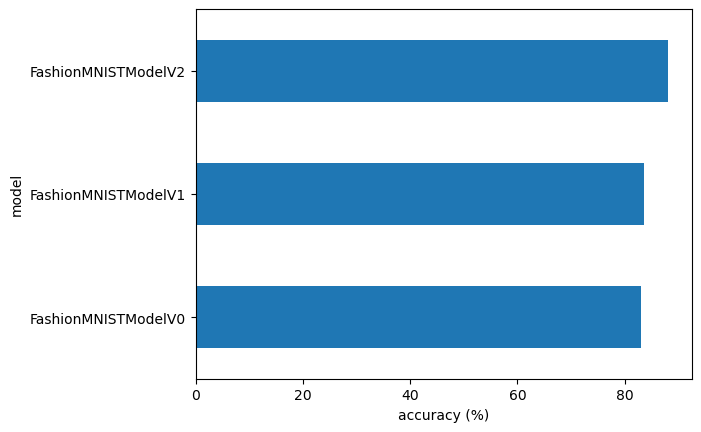

In [37]:
# Visualize our model results
compare_results.set_index("model_name")["model_acc"].plot(kind="barh")
plt.xlabel("accuracy (%)")
plt.ylabel("model");

# Predict with the models

In [52]:
def make_predictions(model: torch.nn.Module, data: list, device: torch.device = device):
    pred_probs = []
    model.eval()
    with torch.inference_mode():
        for sample in data:
            # Prepare sample
            sample = torch.unsqueeze(sample, dim=0).to(device) # Add an extra dimension and send sample to device
            # Forward pass (model outputs raw logit)
            pred_logit = model(sample)
            # Get prediction probability (logit -> prediction probability)
            pred_prob = torch.softmax(pred_logit.squeeze(), dim=0)
            # Get pred_prob off GPU for further calculations
            pred_probs.append(pred_prob.cpu())
    # Stack the pred_probs to turn list into a tensor
    return torch.stack(pred_probs)

In [53]:
import random
def gen_samples(test_data):
    test_samples = []
    test_labels = []
    for sample, label in random.sample(list(test_data), k=9):
        test_samples.append(sample)
        test_labels.append(label)
    return test_samples,test_labels

In [71]:
def plot_pred(test_samples,test_labels):
    plt.figure(figsize=(6, 6))
    nrows = 3
    ncols = 3
    for i, sample in enumerate(test_samples):
        # Create a subplot
        plt.subplot(nrows, ncols, i+1)
        # Plot the target image
        plt.imshow(sample.squeeze(), cmap="gray")
        # Find the prediction label (in text form, e.g. "Sandal")
        pred_label = class_names[pred_classes[i]]
        # Get the truth label (in text form, e.g. "T-shirt")
        truth_label = class_names[test_labels[i]] 
        # Create the title text of the plot
        title_text = f"P: {pred_label} | T: {truth_label}"
        # Check for equality and change title colour accordingly
        if pred_label == truth_label:
            plt.title(title_text, fontsize=8, c="g") # green text if correct
        else:
            plt.title(title_text, fontsize=8, c="r") # red text if wrong
        plt.axis(False);

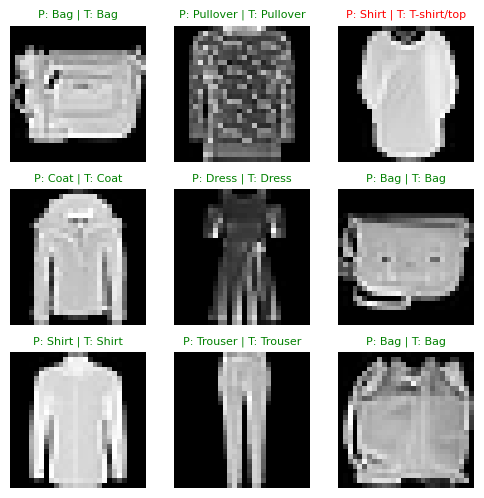

In [72]:
test_samples,test_labels = gen_samples(test_data)
pred_probs= make_predictions(model=model_2, data=test_samples)
pred_classes = pred_probs.argmax(dim=1)
plot_pred(test_samples,test_labels)

## confusion matrix

In [80]:
# Import tqdm for progress bar
from tqdm.auto import tqdm

# 1. Make predictions with trained model
y_preds = []
model_2.eval()
with torch.inference_mode():
    for X, y in tqdm(test_dataloader, desc="Making predictions"):
        # Send data and targets to target device
        X, y = X.to(device), y.to(device)
        # Do the forward pass
        y_logit = model_2(X)
        # Turn predictions from logits -> prediction probabilities -> predictions labels
        y_pred = torch.softmax(y_logit, dim=1).argmax(dim=1)
        # Put predictions on CPU for evaluation
        y_preds.append(y_pred.cpu())
# Concatenate list of predictions into a tensor
y_pred_tensor = torch.cat(y_preds)

Making predictions:   0%|          | 0/313 [00:00<?, ?it/s]

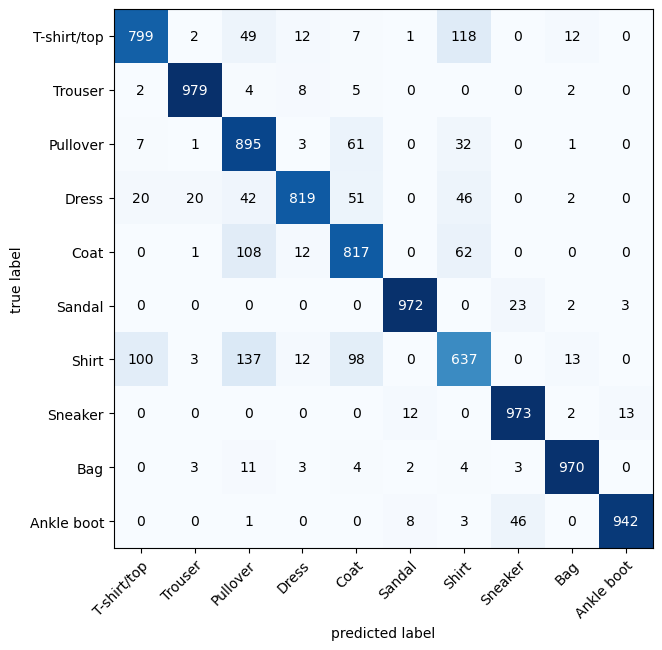

In [81]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

# 2. Setup confusion matrix instance and compare predictions to targets
confmat = ConfusionMatrix(num_classes=len(class_names), task='multiclass')
confmat_tensor = confmat(preds=y_pred_tensor,
                         target=test_data.targets)

# 3. Plot the confusion matrix
fig, ax = plot_confusion_matrix(
    conf_mat=confmat_tensor.numpy(), # matplotlib likes working with NumPy 
    class_names=class_names, # turn the row and column labels into class names
    figsize=(10, 7)
);

# save and load

In [82]:
from pathlib import Path

# Create models directory (if it doesn't already exist), see: https://docs.python.org/3/library/pathlib.html#pathlib.Path.mkdir
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, # create parent directories if needed
                 exist_ok=True # if models directory already exists, don't error
)

# Create model save path
MODEL_NAME = "03_pytorch_computer_vision_model_2.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# Save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_2.state_dict(), # only saving the state_dict() only saves the learned parameters
           f=MODEL_SAVE_PATH)

Saving model to: models/03_pytorch_computer_vision_model_2.pth


In [88]:
# Create a new instance of FashionMNISTModelV2 (the same class as our saved state_dict())
# Note: loading model will error if the shapes here aren't the same as the saved version
loaded_model_2 = FashionMNISTModelV2(input_shape=1, 
                                    hidden_unit=10, # try changing this to 128 and seeing what happens 
                                    output_shape=10) 

# Load in the saved state_dict()
loaded_model_2.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

# Send model to GPU
loaded_model_2 = loaded_model_2.to(device)

In [90]:
# Evaluate loaded model
torch.manual_seed=42

loaded_model_2_results = eval_model(
    model=loaded_model_2,
    data_loader=test_dataloader,
    loss_fn=loss_fn, 
    accuracy_fn=accuracy_fn
)

loaded_model_2_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.33483749628067017,
 'model_acc': 88.0491214057508}

In [91]:
model_2_results

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.33483749628067017,
 'model_acc': 88.0491214057508}

In [86]:
# Check to see if results are close to each other (if they are very far away, there may be an error)
torch.isclose(torch.tensor(model_2_results["model_loss"]), 
              torch.tensor(loaded_model_2_results["model_loss"]),
              atol=1e-08, # absolute tolerance
              rtol=0.0001) # relative tolerance

NameError: name 'loaded_model_2_results' is not defined